<h1 style="font-size: 32px; text-align: center;">Introduction to Computer Programming for the Physical Sciences</h1>
<h2 style="font-size: 24px; text-align: center;">Shane Bechtel</h2>
<h3 style="font-size: 24px; text-align: center;">Spring 2024</h2>

## Working on Section Problems

<ul style="list-style: none;">
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Get into groups of 2 or 3, with at least one laptop per group.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Discuss with each other and attempt each problem yourselves first without AI support for 10-15 mins.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;">
</span>Input the problem prompt into the AI chatbox, use its answer to verify your own, or to learn how it should be solved.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;">
</span>For section problems, you can omit most of the commenting and focus on learning coding. For more difficult problems, minimal comments are still recommended as a way of organizing your own thoughts.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Please abide by the <b><a href="https://github.com/enigma-igm/Phys29/blob/main/using_AI_tools.md">Policy and Guidelines on Using AI Tools</a></b></li>

# Section 6

## Anonymous Poll

### Please first complete this anonymous poll for us to get an idea of how long the homework is taking everyone:
https://forms.gle/U5kUu3c8JMuoBWFJ6

## Problem 1

The sinc function,
\begin{equation}
  sinc(x) =
    \begin{cases}
      \frac{sin(x)}{x} & x\neq 0\\
      1 & x = 0
    \end{cases}       
\end{equation}
shows up frequently in signal processing. One of the important applications of this function in physics is that the intensity pattern of (Fraunhofer) single slit diffraction is given by 
\begin{align}
I(\alpha) &= I_0 sinc^2(\alpha) \tag{1}\\
\end{align}
where $\alpha = (\frac{\pi a}{\lambda}) sin\theta$, a is the slit width, $\lambda$ is the wavelength of light, $\theta$ is the angle that the light makes with the perpendicular direction to the screen, and $I_0$ is the intensity in the direction perpendicular to the screen.

(a) Set $I_0 = 1$, make a plot of the intensity distribution as a function of the parameter $\alpha$, for $−10 \leq \alpha \leq 10$. You can do this by either defining your own sinc function, or using ```np.sinc(alpha/np.pi)``` (note that there is a $\pi$ in the denominator if you use numpy, since it follows a different convention).

(b) The maxima are given by the roots of the following equation:
$$f(\alpha) = \alpha cos(\alpha) - sin(\alpha) = 0 \tag{2}$$
Using either bracketing and bisection, or Newton-Raphson, calculate the lowest $\textbf{positive}$ value of $\alpha$ that give rise to a maximum in the intensity pattern. Plot these locations as points on your graph of the intensity pattern.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy

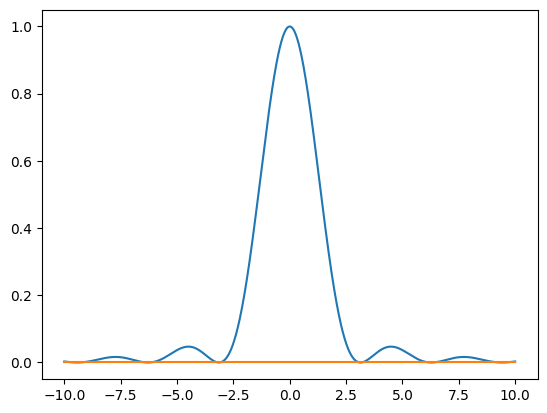

In [17]:
# your solution here

#a)
def I_function(alpha):
    return np.sinc(alpha/np.pi)**2

x = np.linspace(-10,10,1000)
y = I_function(x)
plt.plot(x,y)
plt.plot(x,np.zeros(len(x)))

# hint: 
# 1. Read the lecture notes on root finding, you can use the complete code in the notes for both bisection and Newton's method.
# 2. To find the smallest positive root of equation (2), look at the plot you made for equation (1), and use a good initial guess.
# 3. You do NOT need to plot equation (2), that is only used to find the maximum. Once you find the root, alpha0, you need to plot
#    (alpha0, I(alpha0)) as a single point on top of the plot for equation (1).




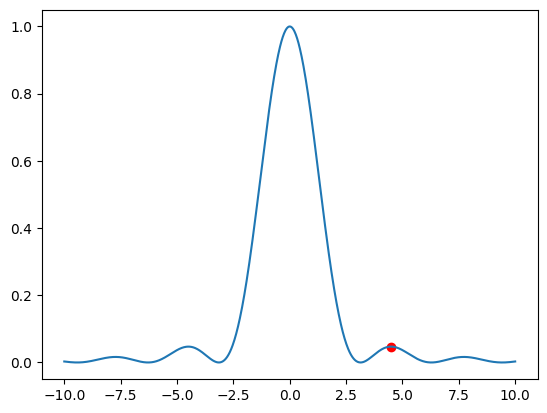

In [22]:
import scipy.optimize


def f_funtion(alpha):
    return alpha*np.cos(alpha)-np.sin(alpha)

a = scipy.optimize.fsolve(f_funtion,4)
plt.scatter(a,I_function(a),c='red')
x = np.linspace(-10,10,1000)
y = I_function(x)
plt.plot(x,y)


## Problem 2

The Gaussian distribution:
\begin{equation}
p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} exp(-\frac{(x - \mu)^2}{2σ^2})
\end{equation}
is probably the most famous statistical distribution. It shows up in a huge range of problems, and you will probably end up using it when analyzing your lab results (even if you don’t realize it). The Gaussian distribution is normalized such that 
$$\int^{\infty}_{-\infty}p(x)dx = 1 $$
and $p(x) dx$ is the infinitesimal probability that a single measurement lies in the interval (x, x + dx), if the underlying quantity you are measuring follows the Gaussian distribution.
Set $\mu = 0$ and $\sigma = 1$. What is the total probability with $−3 < x < 3$? 

In other words, please compute 
$$\int^{3}_{-3}p(x) dx$$ 

Please use a numerical integration scheme of your choice to get a precision of $10^{-6}$. To measure your precision, you can get the exact answer with ```scipy.special.erf(3/np.sqrt(2))```.

In [19]:
# your solution here

# hint: again, you can refer to the lecture notes on the numerical integration schemes

def gaussian_distribution(x,mu=0,sigma=1):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))

def trapezoidal_rule(func, a, b, n, plot=True):
    """
    Compute the integral of func(x) over the interval [a, b] using the trapezoidal rule.

    Parameters
    ----------
    func : callable 
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    n : int, optional
        The number of subintervals to use. 
    plot : bool, optional
        If True, plot the function func(x) over the interval [a, b] as well as the trapezoids 
        used to compute the trapezoidal rule. Default is True.

    Returns
    -------
    answer : float
        The estimate of the integral of func(x) over the interval [a, b].

    """

    # Create the partition of the interval [a, b]
    x = np.linspace(a, b, n+1)
    dx = (b - a) / n

    # Compute the value of the function at the partition points
    y = func(x)

    # Compute the area of each trapezoid, all the values appear twice in this average except the first and last
    area = (dx / 2) * (y[:-1] + y[1:])

    # Compute the integral using the trapezoidal rule
    answer = np.sum(area)

    # Plot the function and the trapezoids
    if plot:
        x_fine = np.linspace(a, b, 1000)
        plt.plot(x_fine, func(x_fine), 'black', label='f(x)')
        plt.plot(x, y, 'ro', label='Endpoints')
        plt.title('Trapezoidal Rule, n = {}'.format(n))
        plt.xlabel('x', fontsize=16)
        plt.ylabel('y', fontsize=16)
        for i in range(n):
            xs = [x[i], x[i], x[i+1], x[i+1]]
            ys =  [0, func(x[i]), func(x[i+1]), 0]
            plt.fill(xs, ys, 'orange', edgecolor='black', alpha=0.8)
        plt.gca().xaxis.set_minor_locator(AutoMinorLocator(5))
        plt.gca().yaxis.set_minor_locator(AutoMinorLocator(5))
        plt.gca().tick_params(which='both', top=True, right=True)
        plt.legend(loc='best')

    return answer

print(trapezoidal_rule(gaussian_distribution,-3,3,10000,False))
scipy.special.erf(3/np.sqrt(2))


0.9973002031390072


0.9973002039367398